## GWTC data

Please make sure to read through and run the commands in this notebook before the workshop — the data takes a long time to download! 

Steps to get the GWTC open data from Zenodo: 

1. Make a conda environment, python=3.10 and activate it
2. `pip install zenodo_get`
3. Go to a directory where you want to install the data
4. For each of the catalogs, run the commands as shown: 

GWTC 2.1 (O1-O2): `zenodo_get https://doi.org/10.5281/zenodo.6513631 -g "*_nocosmo.h5"`

GWTC 3.0 (O3): `zenodo_get https://zenodo.org/records/8177023 -g "*_nocosmo.h5"`

GWTC 4.0 (O4a): `zenodo_get https://zenodo.org/records/17014085`

After having imported all of the data, you can read the files using h5py.



In [ ]:
from pathlib import Path
import h5py
import numpy as np

gwtc_dir = "./gwtc/"
Path.mkdir(gwtc_dir, exist_ok=True)
gwtc_catalog = Path.iterdir(gwtc_dir)

Let's say we want to fetch the median chirp masses of every event so far.

In [ ]:
chirpmass = {}

for file in gwtc_catalog:
    if file.endswith('.h5') or file.endswith('.hdf5'):

        # fetch the event name and load the result file
        event = file.split('-')[-1].split('_')[0]
        result = h5py.File(Path.joinpath(gwtc_dir, file), 'r')

        # depending on the catalog, the key names for the waveforms differ
        # fetch the key corresponding to IMRPhenomXPHM results
        # the waveform most commonly used for BBH events
        # however, some events may not have results for this!
        # and get median chirp_mass from the posteriors

        if 'C01:IMRPhenomXPHM' in result.keys():
            posterior = result['C01:IMRPhenomXPHM']['posterior_samples']
            chirpmass[event] = np.median(posterior['chirp_mass'])

        elif 'C00:IMRPhenomXPHM-SpinTaylor' in result.keys():
            posterior = result['C00:IMRPhenomXPHM-SpinTaylor']['posterior_samples']
            chirpmass[event] = np.median(posterior['chirp_mass'])

Let's plot our chirp_mass distribution...

(array([3., 4., 6., 1., 2., 3., 0., 1., 2., 3., 3., 2., 2., 4., 3., 1., 2.,
        1., 2., 2., 2., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  4.21207512,   6.82647056,   9.440866  ,  12.05526144,
         14.66965688,  17.28405232,  19.89844776,  22.5128432 ,
         25.12723864,  27.74163408,  30.35602952,  32.97042496,
         35.5848204 ,  38.19921584,  40.81361128,  43.42800672,
         46.04240216,  48.6567976 ,  51.27119304,  53.88558848,
         56.49998392,  59.11437936,  61.7287748 ,  64.34317024,
         66.95756568,  69.57196112,  72.18635656,  74.800752  ,
         77.41514744,  80.02954288,  82.64393832,  85.25833376,
         87.8727292 ,  90.48712464,  93.10152008,  95.71591552,
         98.33031096, 100.9447064 , 103.55910184, 106.17349728,
        108.78789272, 111.40228816, 114.0166836 , 116.63107904,
        119.24547448, 121.85986992, 124.47426536, 127.0886608 ,
      

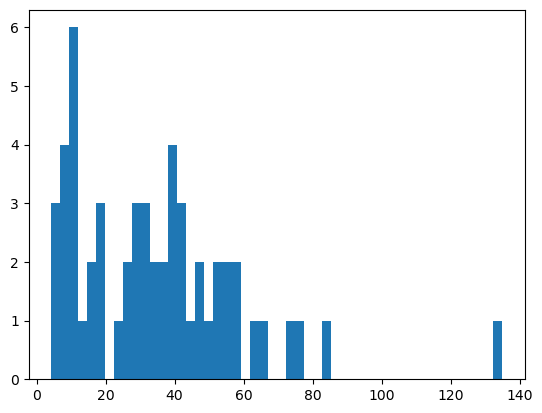

In [6]:
import matplotlib.pyplot as plt

plt.hist(list(chirpmass.values()), bins=50)